In [1]:
#Mount your drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Code
 Implement RBF networks from scratch (no specialized library like sklearn) using the help of ChatGPT. We will not provide the prompts for you this time.

 You are given two datasets:

 *    **'circle in the square'**
 contains two training data sets: *cis_train1.txt* and *cis_train2.txt* (they have different number of samples.) We provide you with one test set: *cis_test.txt*. Apply the RBF network with different parameters (at least three different number of basis functions, and different means and variances) and report the accuracy. Plot the original dataset and the predictions.

 *   **'function approximation'**
 contains two training data sets: *fa_train1.txt* and *fa_train2.txt* (they have different number of samples.) We provided one test set: 'fa_test.txt'. Apply the RBF network with different parameters (at least three different number of basis functions, and different means and variances) and report the MSE. Plot the original dataset and the predictions.

---

**Show all your code below.**

In [2]:
# #code here
# #GPT code

# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.kernel_approximation import RBFSampler
# from sklearn.linear_model import LogisticRegression

# # Function to load data
# def load_data(file_path):
#     file_path = '/content/drive/MyDrive/Colab Notebooks/' + file_path
#     data = np.loadtxt(file_path)
#     X, y = data[:, :-1], data[:, -1]
#     return X, y

# def train_rbf_network(X_train, y_train, num_basis_functions, gamma):
#     rbf_feature = RBFSampler(gamma=gamma, n_components=num_basis_functions, random_state=1)
#     X_train_rbf = rbf_feature.fit_transform(X_train)
#     model = LogisticRegression()
#     model.fit(X_train_rbf, y_train)
#     return model, rbf_feature

# def plot_original_and_predictions(X, y, model, rbf_feature, title):
#     plt.figure(figsize=(5, 3))
#     # Plot original dataset
#     plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='0', marker='.', s=1)
#     plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='1', marker='.', s=1)
#     # Plot predictions
#     x_min, x_max = X[:, 0].min(), X[:, 0].max()
#     y_min, y_max = X[:, 1].min(), X[:, 1].max()
#     xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
#     X_grid = np.c_[xx.ravel(), yy.ravel()]
#     X_grid_rbf = rbf_feature.transform(X_grid)
#     Z = model.predict(X_grid_rbf)
#     Z = Z.reshape(xx.shape)
#     plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
#     plt.suptitle(title, y=0)
#     plt.legend()
#     plt.show()

# def calculate_accuracy(y_true, y_pred):
#   correct = sum(1 for true, pred in zip(y_true, y_pred) if true == pred)
#   total = len(y_true)
#   accuracy = correct / total
#   return accuracy

# # Load data
# X_train1, y_train1 = load_data('cis_train1.txt')
# X_train2, y_train2 = load_data('cis_train2.txt')
# X_test, y_test = load_data('cis_test.txt')

# # Train RBF networks with different parameters
# num_basis_functions = 20  # Choose different numbers of basis functions
# gamma = 1  # Choose different gamma values

# # Train on the first training set
# model, rbf_feature = train_rbf_network(X_train1, y_train1, num_basis_functions, gamma)
# # Evaluate accuracy on the test set
# X_test_rbf = rbf_feature.transform(X_test)
# predictions = model.predict(X_test_rbf)
# accuracy = calculate_accuracy(y_test, predictions)
# # Plot original dataset and predictions
# plot_original_and_predictions(X_test, y_test, model, rbf_feature, f'cis_train1 Accuracy: {accuracy:.2f}')

# # Train on the second training set
# model, rbf_feature = train_rbf_network(X_train2, y_train2, num_basis_functions, gamma)
# # Evaluate accuracy on the test set
# X_test_rbf = rbf_feature.transform(X_test)
# predictions = model.predict(X_test_rbf)
# accuracy = calculate_accuracy(y_test, predictions)
# # Plot original dataset and predictions
# plot_original_and_predictions(X_test, y_test, model, rbf_feature, f'cis_train2 Accuracy: {accuracy:.2f}')

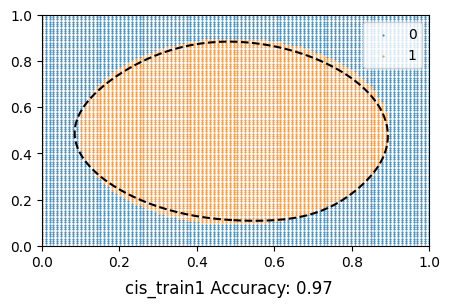

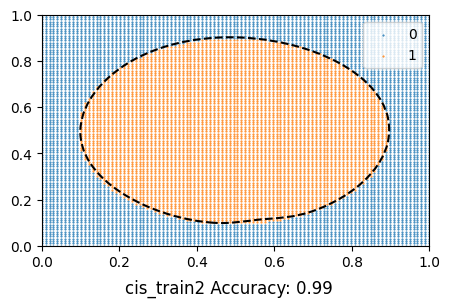

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Function to load data
def load_data(file_path):
    file_path = '/content/drive/MyDrive/Colab Notebooks/' + file_path
    data = np.loadtxt(file_path)
    X, y = data[:, :-1], data[:, -1]
    return X, y

# RBF function
def rbf(X, means, variances):
    return np.exp(-np.sum((X - means)**2 / (2 * variances), axis=1))

# Logistic regression model
def logistic_regression(X, y):
    X_extended = np.column_stack((np.ones(X.shape[0]), X))
    weights = np.zeros(X_extended.shape[1])

    # Use gradient descent for optimization
    alpha = 0.01
    epochs = 10000
    for epoch in range(epochs):
        logits = np.dot(X_extended, weights)
        predictions = 1 / (1 + np.exp(-logits))
        errors = y - predictions
        weights += alpha * np.dot(X_extended.T, errors)

    return weights

# Predict using RBF network
def predict_rbf(X, means, variances, weights):
    X_rbf = np.column_stack([rbf(X, m, v) for m, v in zip(means, variances)])
    X_extended = np.column_stack((np.ones(X_rbf.shape[0]), X_rbf))
    logits = np.dot(X_extended, weights)
    predictions = 1 / (1 + np.exp(-logits))
    return predictions

# Plot original dataset and predictions
def plot_original_and_predictions(X, y, predictions, title):
    plt.figure(figsize=(5, 3))
    # Plot original dataset
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='0', marker='.', s=1)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='1', marker='.', s=1)
    # Plot predictions
    x_min, x_max = X[:, 0].min() , X[:, 0].max()
    y_min, y_max = X[:, 1].min() , X[:, 1].max()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    X_grid = np.c_[xx.ravel(), yy.ravel()]

    # Plot contour lines based on predictions
    Z = predictions.reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[0.5], colors='black', linestyles='dashed')
    plt.suptitle(title, y=0)
    plt.legend()
    plt.show()

# Calculate accuracy
def calculate_accuracy(y_true, y_pred):
    correct = sum(1 for true, pred in zip(y_true, y_pred) if true == pred)
    total = len(y_true)
    accuracy = correct / total
    return accuracy

# Train RBF network
def train_rbf_network(X_train, y_train, num_basis_functions, gamma):
    # Choose random means and variances
    means = np.random.rand(num_basis_functions, X_train.shape[1])
    variances = np.random.rand(num_basis_functions)

    # Transform data using RBF
    X_rbf = np.column_stack([rbf(X_train, m, v) for m, v in zip(means, variances)])

    # Train logistic regression model
    weights = logistic_regression(X_rbf, y_train)

    return means, variances, weights

# Main
if __name__ == "__main__":
    # Load data
    X_train1, y_train1 = load_data('cis_train1.txt')
    X_train2, y_train2 = load_data('cis_train2.txt')
    X_test, y_test = load_data('cis_test.txt')

    # Train RBF networks with different parameters
    num_basis_functions = 30  # Choose different numbers of basis functions
    gamma = 0.01  # Choose dfferent gamma values

    # Train on the first training set
    means, variances, weights = train_rbf_network(X_train1, y_train1, num_basis_functions, gamma)
    # Make predictions on the test set
    predictions = predict_rbf(X_test, means, variances, weights)
    # Calculate accuracy
    accuracy = calculate_accuracy(y_test, np.round(predictions))
    # Plot original dataset and predictions
    plot_original_and_predictions(X_test, y_test, predictions, f'cis_train1 Accuracy: {accuracy:.2f}')

    # Train on the second training set
    means, variances, weights = train_rbf_network(X_train2, y_train2, num_basis_functions, gamma)
    # Make predictions on the test set
    predictions = predict_rbf(X_test, means, variances, weights)
    # Calculate accuracy
    accuracy = calculate_accuracy(y_test, np.round(predictions))
    # Plot original dataset and predictions
    plot_original_and_predictions(X_test, y_test, predictions, f'cis_train2 Accuracy: {accuracy:.2f}')

In [4]:
# GPT code
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.kernel_approximation import RBFSampler
# from sklearn.linear_model import LinearRegression

# # Function to train RBF network
# def train_rbf_network(X_train, y_train, num_basis_functions, gamma):
#     rbf_feature = RBFSampler(gamma=gamma, n_components=num_basis_functions, random_state=1)
#     X_train_rbf = rbf_feature.fit_transform(X_train)
#     model = LinearRegression()
#     model.fit(X_train_rbf, y_train)
#     return model, rbf_feature

# # Function to make predictions and calculate MSE
# def evaluate_rbf_model(model, rbf_feature, X_test, y_test):
#     X_test_rbf = rbf_feature.transform(X_test)
#     predictions = model.predict(X_test_rbf)
#     mse = np.mean((y_test - predictions) ** 2)
#     return predictions, mse

# # Function to plot original dataset and predictions
# def plot_original_and_predictions(X, y, predictions, title):
#     plt.scatter(X, y, label='Original Data', marker='.', s=2)
#     plt.scatter(X, predictions, label='Predictions', marker='.', s=2)
#     plt.title(title)
#     plt.legend()
#     plt.show()

# # Load data
# X_train1, y_train1 = load_data('fa_train1.txt')
# X_train2, y_train2 = load_data('fa_train2.txt')
# X_test, y_test = load_data('fa_test.txt')

# # Train RBF networks with different parameters for each training set
# num_basis_functions = 30  # Choose different numbers of basis functions
# gamma = 0.1  # Choose different gamma values

# # Train on the first training set
# model1, rbf_feature1 = train_rbf_network(X_train1, y_train1, num_basis_functions, gamma)
# # Evaluate on the test set
# predictions1, mse1 = evaluate_rbf_model(model1, rbf_feature1, X_test, y_test)
# # Plot original dataset and predictions
# plot_original_and_predictions(X_test, y_test, predictions1, f'fa_train1.txt MSE={mse1:.4f}')

# # Train on the second training set
# model2, rbf_feature2 = train_rbf_network(X_train2, y_train2, num_basis_functions, gamma)
# # Evaluate on the test set
# predictions2, mse2 = evaluate_rbf_model(model2, rbf_feature2, X_test, y_test)
# # Plot original dataset and predictions
# plot_original_and_predictions(X_test, y_test, predictions2, f'fa_train2.txt MSE={mse2:.4f}')

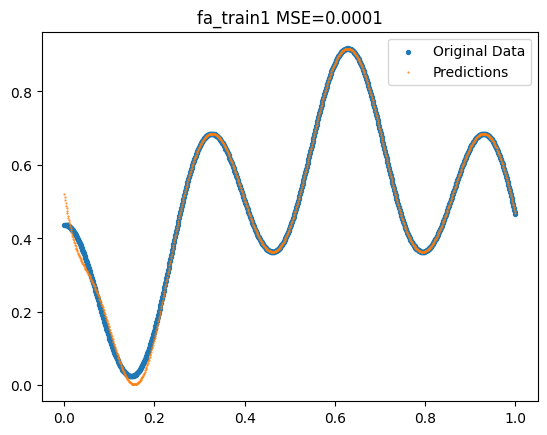

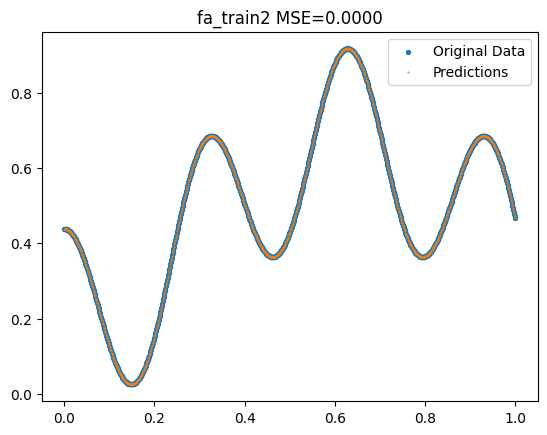

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Function to load data
def load_data(file_path):
    file_path = '/content/drive/MyDrive/Colab Notebooks/' + file_path
    data = np.loadtxt(file_path)
    X, y = data[:, :-1], data[:, -1]
    return X, y

# Function to implement RBF feature transformation
def rbf_feature_transform(X, centers, widths):
    num_samples, num_centers = X.shape[0], centers.shape[0]
    rbf_features = np.zeros((num_samples, num_centers))

    for i in range(num_samples):
        for j in range(num_centers):
            rbf_features[i, j] = np.exp(-0.5 * np.sum((X[i] - centers[j]) ** 2) / (widths[j] ** 2))

    return rbf_features

# Function to implement linear regression
def linear_regression(X, y):
    X_transpose = np.transpose(X)
    X_transpose_X = np.dot(X_transpose, X)
    X_transpose_y = np.dot(X_transpose, y)
    weights = np.linalg.solve(X_transpose_X, X_transpose_y)
    return weights

# Function to make predictions
def predict_linear_regression(X, weights):
    predictions = np.dot(X, weights)
    return predictions

# Function to train RBF network
def train_rbf_network(X_train, y_train, num_basis_functions, gamma):
    np.random.seed(1)
    centers = np.random.rand(num_basis_functions, X_train.shape[1])
    widths = np.ones(num_basis_functions) * gamma
    X_train_rbf = rbf_feature_transform(X_train, centers, widths)
    weights = linear_regression(X_train_rbf, y_train)
    return weights, centers, widths

# Function to evaluate RBF model
def evaluate_rbf_model(weights, centers, widths, X_test, y_test):
    X_test_rbf = rbf_feature_transform(X_test, centers, widths)
    predictions = predict_linear_regression(X_test_rbf, weights)
    mse = np.mean((y_test - predictions) ** 2)
    return predictions, mse

# Function to plot original dataset and predictions
def plot_original_and_predictions(X, y, predictions, title):
    plt.scatter(X, y, label='Original Data', marker='o', s=8)
    plt.scatter(X, predictions, label='Predictions', marker='.', s=1)
    plt.title(title)
    plt.legend()
    plt.show()

# Load data
X_train1, y_train1 = load_data('fa_train1.txt')
X_train2, y_train2 = load_data('fa_train2.txt')
X_test, y_test = load_data('fa_test.txt')

# Train RBF networks with different parameters for each training set
num_basis_functions = 30  # Choose different numbers of basis functions
gamma = 0.1  # Choose different gamma values

# Train on the first training set
weights1, centers1, widths1 = train_rbf_network(X_train1, y_train1, num_basis_functions, gamma)
# Evaluate on the test set
predictions1, mse1 = evaluate_rbf_model(weights1, centers1, widths1, X_test, y_test)
# Plot original dataset and predictions
plot_original_and_predictions(X_test, y_test, predictions1, f'fa_train1 MSE={mse1:.4f}')

# Train on the second training set
weights2, centers2, widths2 = train_rbf_network(X_train2, y_train2, num_basis_functions, gamma)
# Evaluate on the test set
predictions2, mse2 = evaluate_rbf_model(weights2, centers2, widths2, X_test, y_test)
# Plot original dataset and predictions
plot_original_and_predictions(X_test, y_test, predictions2, f'fa_train2 MSE={mse2:.4f}')

# Report


1.   What were some challenges that you encountered while using ChatGPT to assist you in this task? (Name at least 2)

1) In the circle in square example, the cases we are given are made up of (x,y) coordinates and labels that determine whether they fit inside a circle. However, without a clear explanation of the cases, gpt did not know what these values meant and performed strange classifications. Here are some examples:

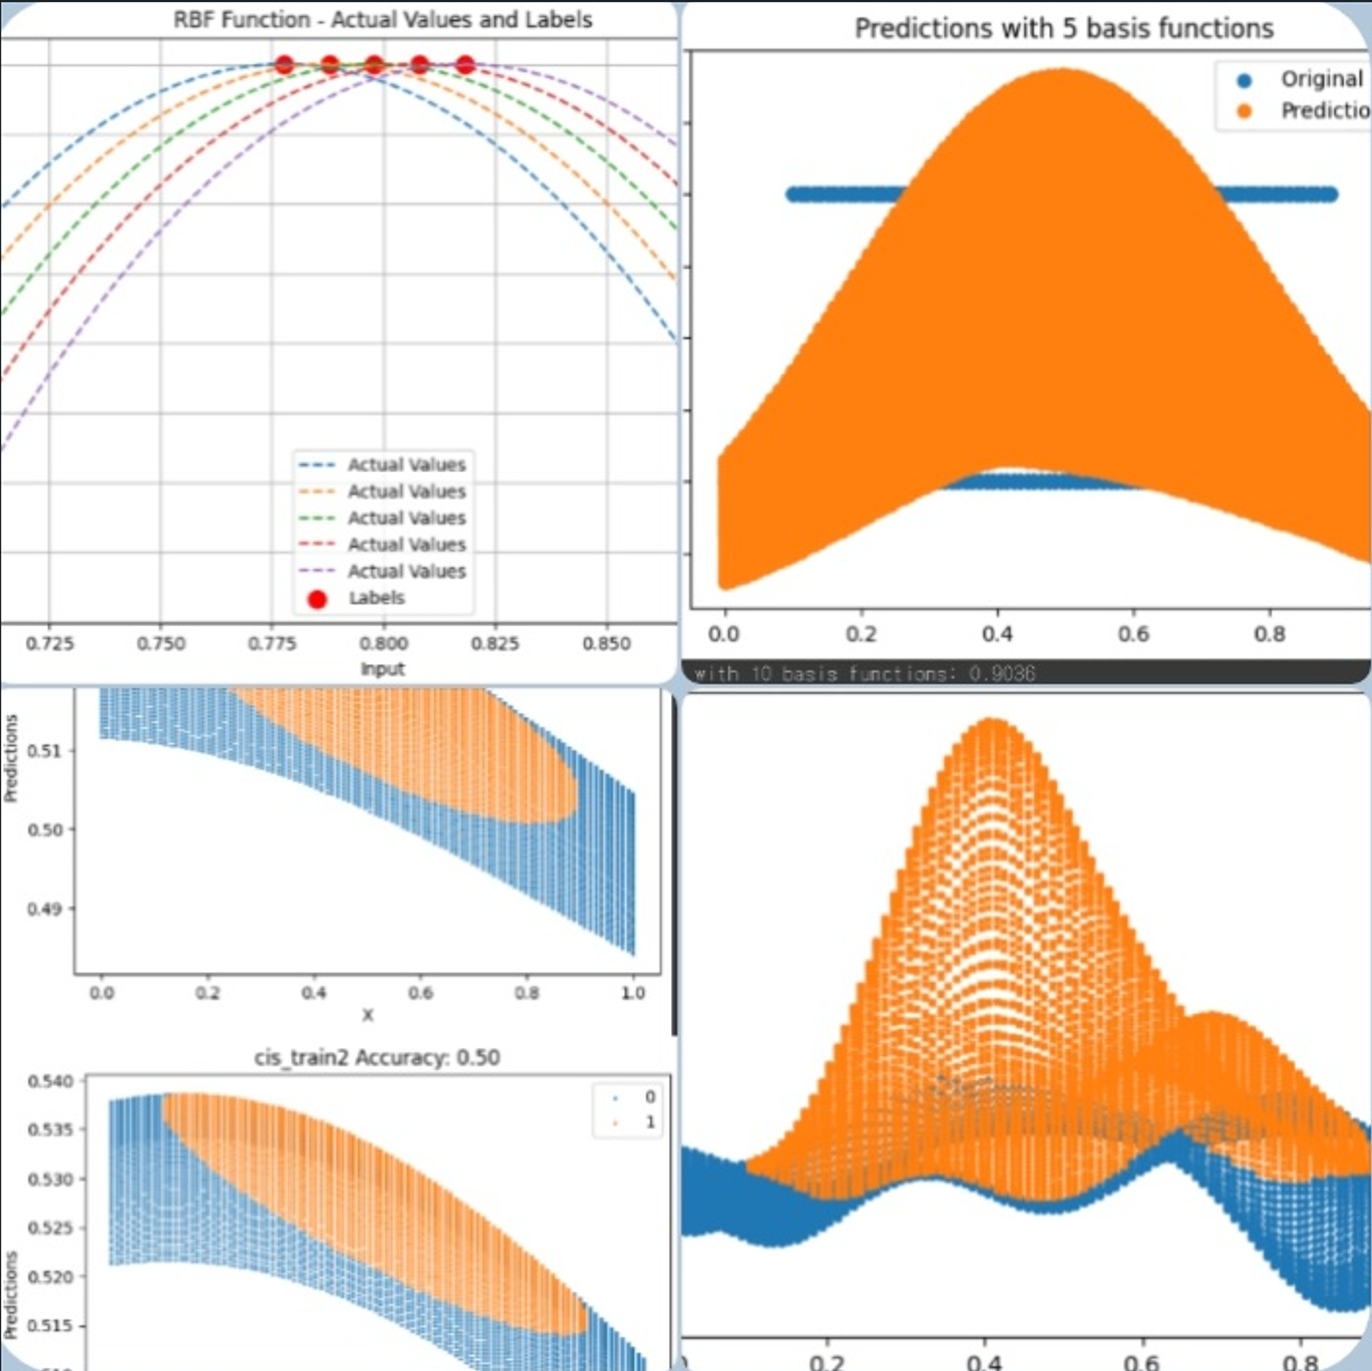![image](https://drive.google.com/file/d/1yrYNERm238d7y7zpsqXm1dROQPHzUXUe/view?usp=sharing)


<img src="https://drive.google.com/file/d/1yrYNERm238d7y7zpsqXm1dROQPHzUXUe/view?usp=sharing" alt="example image">

2) Even though my code is implemented using numpy, the basic library, and issues arose, when I asked gpt for a solution, it always suggested solutions using sklearn. Except for really simple refactoring, the default for gpt responses has always been sklearn.

---

2.   Ask ChatGPT to analyse the advantages of using a larger dataset for the RBFN. Do you agree with ChatGPT's statement? Why yes or why not?

> GPT Response:Using a larger dataset for training a Radial Basis Function
Network (RBFN) can offer several advantages:
1. **Improved Generalization:**
   - A larger dataset provides a more comprehensive representation of the underlying distribution of the data. This helps the model to learn the underlying patterns more effectively and, as a result, generalize better to unseen data.
2. **Reduced Overfitting:**
   - With a larger dataset, the risk of overfitting is reduced. Overfitting occurs when a model learns the training data too well, including its noise and outliers. A larger dataset helps the model focus on the underlying patterns, making it less prone to fitting the noise.
3. **Enhanced Robustness:**
   - A model trained on a larger dataset is often more robust and less sensitive to variations in the input data. It is better equipped to handle diverse scenarios and is less likely to be influenced by outliers or anomalies present in smaller datasets.
4. **Increased Model Complexity:**
   - A larger dataset allows for training more complex models without the risk of overfitting. More complex models can capture intricate relationships in the data, potentially improving the model's performance on both the training and test sets.
5. **Better Hyperparameter Tuning:**
   - Larger datasets provide a richer set of examples for hyperparameter tuning. This allows for a more accurate selection of hyperparameters, such as the number of basis functions in the RBFN or the width of the Gaussian functions, leading to improved model performance.
6. **More Representative Training:**
   - A larger dataset is more likely to be representative of the overall population or distribution from which it is sampled. This representation can contribute to a more accurate and reliable model.
7. **Handling Rare Events:**
   - In situations where the dataset includes rare events or specific scenarios, a larger dataset is more likely to capture these occurrences. This is particularly important in applications where certain patterns or events are infrequent but still crucial for the model to learn.
8. **Stable Performance Across Time:**
   - Models trained on larger datasets are often more stable over time. They are less susceptible to fluctuations caused by minor changes in the input data, making them more suitable for long-term deployment.
9. **Better Initialization:**
   - Larger datasets provide a more stable foundation for initializing model parameters. This can lead to faster convergence during training and potentially help avoid issues associated with poor initialization in smaller datasets.<br><br>
It's important to note that while a larger dataset offers these advantages, the quality and relevance of the data are equally crucial. Cleaning the data, handling missing values, and ensuring a diverse representation of scenarios are essential steps regardless of the dataset's size.

Yes, I agree with the points mentioned. A larger dataset provides a more comprehensive view of the data distribution, allowing the model to capture the underlying patterns more effectively. This could be watched when accuracy of dataset is grower with their size.

---

3.   Compare the results when you varied the parameters. Which configuration yield the best results for each task?

In the circle in square example, the gamma value and num_basis_functions had the highest accuracy when the middle value was neither too large nor too small. On the other hand, in function approximation, the smaller gamma and the larger num_basis_functions, the lower the mse.

---

4.   Conclude with some thoughts and things you learned from this homework.

The task demonstrated the significance of hyperparameter tuning in machine learning models. The choice of parameters, such as gamma and the number of basis functions in RBF networks, can significantly impact the model's performance.
Implementing models from scratch (without relying on specialized libraries like scikit-learn) provides a deeper understanding of the underlying algorithms and processes. It also allows for more flexibility and control over the model. Sometimes the accuracy would also increased.
Dealing with real-world datasets often involves facing practical challenges, such as handling data loading, preprocessing, and plotting the results. Addressing these challenges was an great experience.

